In [124]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
import sys
plt.style.use('siads')

%matplotlib inline

POD-QDEIM train err =  0.044387825
NIF train err =        0.00785156
POD-QDEIM test err  =  3.7704165
NIF test err =         0.46591967


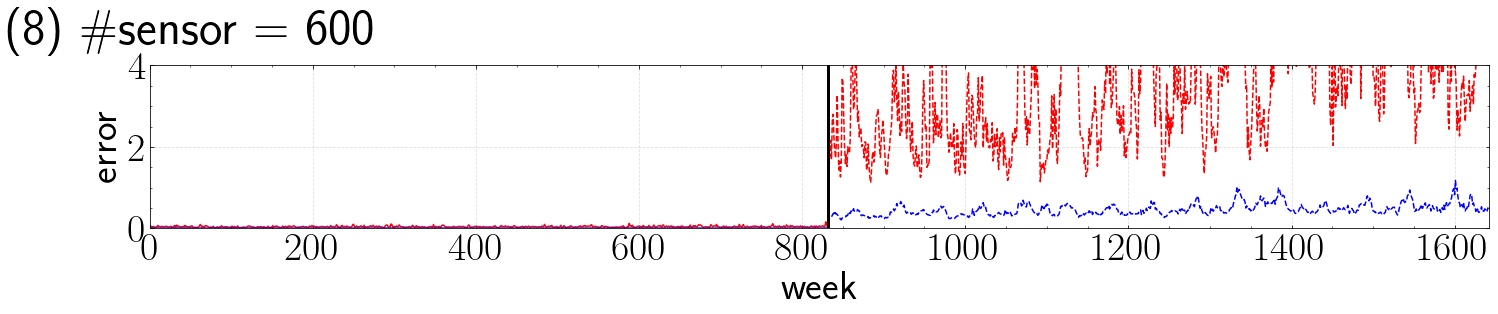

In [125]:
N_SENSOR = 600
ntestw = 1642-832

PLOT_ALL = True


## load NIF data + sensor

iii = -1
if N_SENSOR == 5:
    iii = 1
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_5_NSENSOR_5'
elif N_SENSOR == 6:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_6_NSENSOR_6'
elif N_SENSOR == 7:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_7_NSENSOR_7'
elif N_SENSOR == 8:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_8_NSENSOR_8'
elif N_SENSOR == 9:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_9_NSENSOR_9'
elif N_SENSOR == 10:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_10_NSENSOR_10'
    iii = 2
elif N_SENSOR == 20:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_20_NSENSOR_20'
    iii = 3
elif N_SENSOR == 50:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_60_LST_2_NP_50_NSENSOR_50'
    iii = 4
elif N_SENSOR == 100:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_100_LST_2_NP_100_NSENSOR_100'
    iii = 5
elif N_SENSOR == 200:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_200_LST_2_NP_200_NSENSOR_200'
    iii = 6
elif N_SENSOR == 300:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_300_LST_2_NP_300_NSENSOR_300'
elif N_SENSOR == 400:
    iii = 7
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_400_LST_2_NP_400_NSENSOR_400'
elif N_SENSOR == 500:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_500_LST_2_NP_500_NSENSOR_500'
elif N_SENSOR == 600:
    MODEL_NAME = 'SST_NIF_SIREN_NSNAP_832_NSX_60_LSX_2_NST_600_LST_2_NP_600_NSENSOR_600'
    iii =8

    
sensor_path = './NIF/' + str(N_SENSOR) + '_sensor_location.npz'
i_sensor = np.load(sensor_path)['i_sensor']
output_arr_u = np.load('./NIF/'+MODEL_NAME+'/output_arr_u.npz')['output_arr_u']

## load POD-QDEIM data

output_arr_u_qdeim = np.load('./QDEIM/sensing_result_svd_'+str(N_SENSOR)+'_sensor_'+str(N_SENSOR)+'.npz')

xx_=output_arr_u_qdeim['xx']
yy_=output_arr_u_qdeim['yy']
A = output_arr_u_qdeim['A']
A_inferred = output_arr_u_qdeim['A_inferred']
A_test = output_arr_u_qdeim['A_test']
A_test_inferred = output_arr_u_qdeim['A_test_inferred']

## Visualization of the first snapshot - year 1990

ut_1 = A[:,0]
up_1_qdeim = A_inferred[:,0]
up_1_nif = output_arr_u[0,:]

title_list = ['True', 'QDEIM (Manohar et al. (2018))', 'NIF-SS (Ours)']

def plot_3_contours(ul,um,ur,vmin,vmax,iii, N_SENSOR,draw_color_bar=False, affix=None, title_list=None, PLOT_SENSOR=True):
    fig,axs = plt.subplots(1,3,figsize=(20,4))    
    levels = np.linspace(-3,37,100)
    size = 0.5

    im = axs[0].scatter(xx_,yy_,s=size,c=ul,vmin=vmin,vmax=vmax,cmap='jet')
    im = axs[1].scatter(xx_,yy_,s=size,c=um,vmin=vmin,vmax=vmax,cmap='jet')
    im = axs[2].scatter(xx_,yy_,s=size,c=ur,vmin=vmin,vmax=vmax,cmap='jet')

    if draw_color_bar:
        plt.colorbar(im, ax=axs[2],shrink=1)        

    if iii == 1:
        for i in range(3):
            axs[i].set_title(title_list[i],size=30)

    ## sensor locations
    if PLOT_SENSOR:
        im = axs[1].scatter(xx_[i_sensor],yy_[i_sensor],s=4,c='k')
        im = axs[2].scatter(xx_[i_sensor],yy_[i_sensor],s=4,c='k')

    if iii == 1:
        fig.suptitle('({}) \#sensor = {}'.format(iii,N_SENSOR),fontsize=42,x=0.15,y=1.15)
    else:
        fig.suptitle('({}) \#sensor = {}'.format(iii,N_SENSOR),fontsize=42,x=0.15,y=1.05)

    for k in range(3):
        axs[k].set_xticks([])
        axs[k].set_yticks([])
        axs[k].set_xlim([0,360])
        axs[k].set_ylim([-90,90])

    # fig.tight_layout()
    # im = axs[1,2].scatter(xx_,yy_,s=size,c=err_5,vmin=-3,vmax=37,cmap='jet')
    # # im = axs[1,2].imshow(err_5)
    # plt.colorbar(im,ax=axs[1,2])

    plt.savefig('./png-compare-models-sst/'+str(N_SENSOR)+affix+'.png',bbox_inches='tight')
    plt.close()
    
plot_3_contours(ut_1, up_1_qdeim, up_1_nif, -3,37,iii,N_SENSOR, False,'_sensor_sst_compare_1st_train',title_list)

## Visualization of the last training snapshot - year 2006
ut_1 = A[:,-1]
up_1_qdeim = A_inferred[:,-1]
up_1_nif = output_arr_u[831,:]

plot_3_contours(ut_1, up_1_qdeim, up_1_nif, -3,37,iii,N_SENSOR, False,'_sensor_sst_compare_last_train',title_list)

## Compute spatially mean squared error from NIF-SS

N_MESH = ut_1.shape[0]
mse_train_nifss = np.linalg.norm(output_arr_u[:832].T-A, axis=0)**2/N_MESH
mse_test_nifss = np.linalg.norm(output_arr_u[832:].T-A_test, axis=0)**2/N_MESH

## Visualization of the training, testing spatially M.S.E. error vs year

time_train = np.arange(832)
time_test = np.arange(832,832+ntestw)

# we compute: sum_space (point-wise error)**2 / space-dof
mse_train_qdeim = output_arr_u_qdeim['train_sensing_err']**2/N_MESH 
mse_test_qdeim = output_arr_u_qdeim['test_sensing_err']**2/N_MESH

fig=plt.figure(figsize=(24,3))
plt.plot(time_train,mse_train_qdeim,'r-',label='QDEIM (train)')
plt.plot(time_train,mse_train_nifss,'b-',label='NIF-SS (train)')

plt.plot(time_test,mse_test_qdeim,'r--',label='QDEIM (test)')
plt.plot(time_test,mse_test_nifss,'b--',label='NIF-SS (test)')

# plt.yscale('log')
plt.plot([832, 832], [0, 4], 'k-',lw=3)
# plt.text(832,5,'train',fontsize=25)

plt.xlim([0,1642])

plt.xlabel('week',size=40)
plt.ylabel('error',size=40)
# plt.legend(fontsize=25,bbox_to_anchor=(1.0, 0.5))
plt.tick_params(axis='both', labelsize=40)
fig.suptitle('({}) \#sensor = {}'.format(iii,N_SENSOR),fontsize=50,x=0.15,y=1.15)
# fig.tight_layout()
# plt.xlim([0,950])
plt.ylim([0,4])
plt.savefig('./png-compare-models-sst/'+str(N_SENSOR)+'_sensor_mse_compare.png',bbox_inches='tight',dpi=200)



## now we can also compute temporally m.s.e distribution in the world

# so we can see which regime is more difficult to predict over a long time span

test_err_qdeim = A_test_inferred - A_test
test_err_nisff = output_arr_u[832:,:].T - A_test

# temporally MSE
tmse_qdeim = np.linalg.norm(test_err_qdeim,axis=1)**2/test_err_qdeim.shape[0]
tmse_nifss = np.linalg.norm(test_err_nisff,axis=1)**2/test_err_nisff.shape[0]

tmse_nifss_factored = tmse_nifss * 5

title_list= ['QDEIM (Manohar et al. (2018))', 'NIF-SS (Ours)','NIF-SS (Ours) x 5']
plot_3_contours(tmse_qdeim, tmse_nifss, tmse_nifss_factored, 0, 0.2, iii, 
                N_SENSOR, False,'_sensor_sst_temporal_test_mse_distribution',
                title_list,PLOT_SENSOR=False)

# print and save average error
print('POD-QDEIM train err = ', mse_train_qdeim.mean())
print('NIF train err =       ', mse_train_nifss.mean())
print('POD-QDEIM test err  = ', mse_test_qdeim.mean())
print('NIF test err =        ', mse_test_nifss.mean())

np.savez('./tmp_err/'+str(N_SENSOR)+'_err.npz',
         train_qdeim_err=mse_train_qdeim,
         train_nifss_err=mse_train_nifss,
         test_qdeim_err=mse_test_qdeim,
         test_nifss_err=mse_test_nifss
        )

## Processing all plots

### y-log only

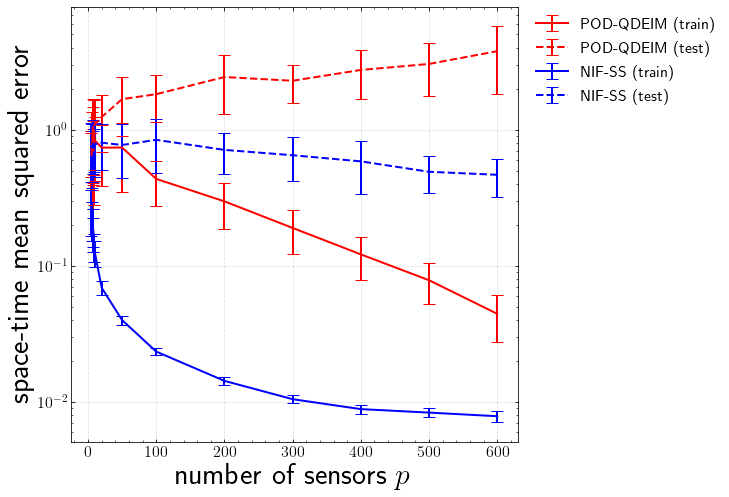

In [126]:
train_qdeim_err_list = []
train_nifss_err_list = []
test_qdeim_err_list = []
test_nifss_err_list = []


if PLOT_ALL:
    SENSOR_ARR = np.array([5,6,7,8,9,10,20,50,100,200,300,400,500,600])
    for n_s in SENSOR_ARR:
        tmp = np.load('./tmp_err/'+str(n_s)+'_err.npz')
        train_qdeim_err_list.append(tmp['train_qdeim_err'])
        train_nifss_err_list.append(tmp['train_nifss_err'])
        test_qdeim_err_list.append(tmp['test_qdeim_err'])
        test_nifss_err_list.append(tmp['test_nifss_err'])

    train_qdeim_err_list = np.array(train_qdeim_err_list)
    train_nifss_err_list = np.array(train_nifss_err_list)
    test_qdeim_err_list  = np.array(test_qdeim_err_list)
    test_nifss_err_list  = np.array(test_nifss_err_list)

    # vs mean
    plt.figure(figsize=(8,8))
    plt.errorbar(SENSOR_ARR, train_qdeim_err_list.mean(axis=1),
                 yerr=train_qdeim_err_list.std(axis=1),label='POD-QDEIM (train)', capsize=6,fmt='r-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_qdeim_err_list.mean(axis=1),
                 yerr=test_qdeim_err_list.std(axis=1),label='POD-QDEIM (test)', capsize=6, fmt='r--',lw=2)
    
    plt.errorbar(SENSOR_ARR, train_nifss_err_list.mean(axis=1),
                 yerr=train_nifss_err_list.std(axis=1),label='NIF-SS (train)', capsize=6, fmt='b-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_nifss_err_list.mean(axis=1),
                 yerr=test_nifss_err_list.std(axis=1),label='NIF-SS (test)', capsize=6,fmt='b--',lw=2)
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.01))
    plt.yscale('log')
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.savefig('./png-error-trend/compare_ylog.png',bbox_inches='tight')
    

### log-log

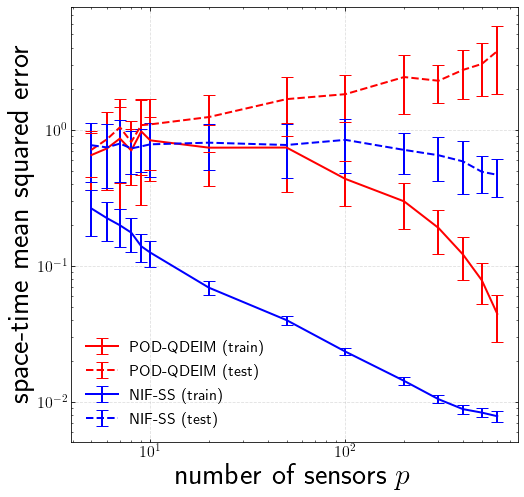

In [127]:
train_qdeim_err_list = []
train_nifss_err_list = []
test_qdeim_err_list = []
test_nifss_err_list = []


if PLOT_ALL:
    SENSOR_ARR = np.array([5,6,7,8,9,10,20,50,100,200,300,400,500,600])
    for n_s in SENSOR_ARR:
        tmp = np.load('./tmp_err/'+str(n_s)+'_err.npz')
        train_qdeim_err_list.append(tmp['train_qdeim_err'])
        train_nifss_err_list.append(tmp['train_nifss_err'])
        test_qdeim_err_list.append(tmp['test_qdeim_err'])
        test_nifss_err_list.append(tmp['test_nifss_err'])

    train_qdeim_err_list = np.array(train_qdeim_err_list)
    train_nifss_err_list = np.array(train_nifss_err_list)
    test_qdeim_err_list  = np.array(test_qdeim_err_list)
    test_nifss_err_list  = np.array(test_nifss_err_list)

    # vs mean
    plt.figure(figsize=(8,8))
    plt.errorbar(SENSOR_ARR, train_qdeim_err_list.mean(axis=1),
                 yerr=train_qdeim_err_list.std(axis=1),label='POD-QDEIM (train)', capsize=6,fmt='r-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_qdeim_err_list.mean(axis=1),
                 yerr=test_qdeim_err_list.std(axis=1),label='POD-QDEIM (test)', capsize=6, fmt='r--',lw=2)
    
    plt.errorbar(SENSOR_ARR, train_nifss_err_list.mean(axis=1),
                 yerr=train_nifss_err_list.std(axis=1),label='NIF-SS (train)', capsize=6, fmt='b-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_nifss_err_list.mean(axis=1),
                 yerr=test_nifss_err_list.std(axis=1),label='NIF-SS (test)', capsize=6,fmt='b--',lw=2)
    # plt.legend(loc='best',bbox_to_anchor=(1.01, 1.01))
    plt.legend(loc='best')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.savefig('./png-error-trend/compare_ylogxlog.png',bbox_inches='tight')
    

## compute the skewness?

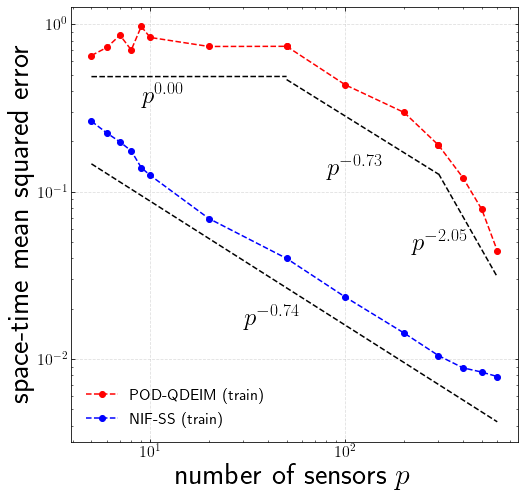

In [128]:
if PLOT_ALL:
    plt.figure(figsize=(8,8))

    ## FULL POD-QDEIM
    # plt.plot(np.log10(SENSOR_ARR), np.log10(train_qdeim_err_list.mean(axis=1)),'ko-',line)

    # FIRST FEW of POD-QDEIM
    N1=8
    plt.plot(SENSOR_ARR[:N1], train_qdeim_err_list.mean(axis=1)[:N1],'ro--')
    a_qdeim_tr = np.polyfit(np.log10(SENSOR_ARR)[:N1], np.log10(train_qdeim_err_list.mean(axis=1))[:N1], deg=1)
    a_qdeim_tr[1]-=0.2
    plt.plot(SENSOR_ARR[:N1], 10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[:N1])) ,'k--')
    plt.text(SENSOR_ARR[int(N1/2)], 0.7*10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[int(N1/2)])), 
             '$p^{'+"{:10.2f}".format(a_qdeim_tr[0])+'}$',size=25)

    # 2nd part
    N2=11
    plt.plot(SENSOR_ARR[N1-1:N2], train_qdeim_err_list.mean(axis=1)[N1-1:N2],'ro--')
    a_qdeim_tr = np.polyfit(np.log10(SENSOR_ARR)[N1-1:N2], np.log10(train_qdeim_err_list.mean(axis=1))[N1-1:N2], deg=1)
    a_qdeim_tr[1]-=0.2
    plt.text(0.8*SENSOR_ARR[int((N1+N2-1)/2.2)], 0.45*10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[int((N1+N2-1)/2.2)])), 
             '$p^{'+"{:10.2f}".format(a_qdeim_tr[0])+'}$',size=25)
    plt.plot(SENSOR_ARR[N1-1:N2], 10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[N1-1:N2])) ,'k--')

    # 3rd part
    N3=14
    plt.plot(SENSOR_ARR[N2-1:N3], train_qdeim_err_list.mean(axis=1)[N2-1:N3],'ro--',label='POD-QDEIM (train)')
    a_qdeim_tr = np.polyfit(np.log10(SENSOR_ARR)[N2-1:N3], np.log10(train_qdeim_err_list.mean(axis=1))[N2-1:N3], deg=1)
    a_qdeim_tr[1]-=0.2
    plt.text(0.72*SENSOR_ARR[int((N3+N2-1)/2.2)], 0.35*10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[int((N3+N2-1)/2.2)])), 
             '$p^{'+"{:10.2f}".format(a_qdeim_tr[0])+'}$',size=25)
    plt.plot(SENSOR_ARR[N2-1:N3], 10**np.polyval(a_qdeim_tr, np.log10(SENSOR_ARR[N2-1:N3])) ,'k--')


    ## NIFSS
    plt.plot(SENSOR_ARR, train_nifss_err_list.mean(axis=1),'bo--',label='NIF-SS (train)')
    a_nifss_tr = np.polyfit(np.log10(SENSOR_ARR), np.log10(train_nifss_err_list.mean(axis=1)), deg=1)
    a_nifss_tr[1]-=0.2
    plt.plot(SENSOR_ARR, 10**np.polyval(a_nifss_tr, np.log10(SENSOR_ARR)) ,'k--')
    plt.text(0.6*SENSOR_ARR[int(N3/2)], 0.6*10**np.polyval(a_nifss_tr, np.log10(SENSOR_ARR[int(N3/2)])), 
             '$p^{'+"{:10.2f}".format(a_nifss_tr[0])+'}$',size=25)

    plt.legend(loc='best')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.savefig('./png-error-trend/compare_train_skewness_ylogxlog.png',bbox_inches='tight')

# draw no log scale

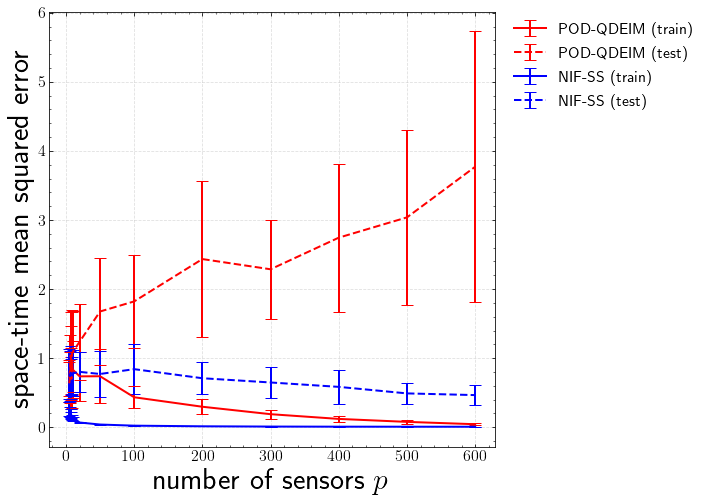

In [129]:
if PLOT_ALL:

    # vs mean
    plt.figure(figsize=(8,8))
    plt.errorbar(SENSOR_ARR, train_qdeim_err_list.mean(axis=1),
                 yerr=train_qdeim_err_list.std(axis=1),label='POD-QDEIM (train)', capsize=6,fmt='r-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_qdeim_err_list.mean(axis=1),
                 yerr=test_qdeim_err_list.std(axis=1),label='POD-QDEIM (test)', capsize=6, fmt='r--',lw=2)
    
    plt.errorbar(SENSOR_ARR, train_nifss_err_list.mean(axis=1),
                 yerr=train_nifss_err_list.std(axis=1),label='NIF-SS (train)', capsize=6, fmt='b-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_nifss_err_list.mean(axis=1),
                 yerr=test_nifss_err_list.std(axis=1),label='NIF-SS (test)', capsize=6,fmt='b--',lw=2)
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.01))
    # plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.savefig('./png-error-trend/compare_nolog.png',bbox_inches='tight')

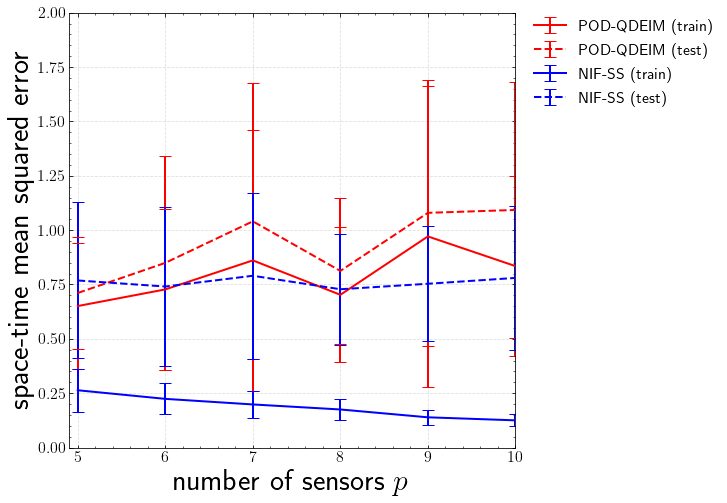

In [130]:
if PLOT_ALL:

    # vs mean
    plt.figure(figsize=(8,8))
    plt.errorbar(SENSOR_ARR, train_qdeim_err_list.mean(axis=1),
                 yerr=train_qdeim_err_list.std(axis=1),label='POD-QDEIM (train)', capsize=6,fmt='r-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_qdeim_err_list.mean(axis=1),
                 yerr=test_qdeim_err_list.std(axis=1),label='POD-QDEIM (test)', capsize=6, fmt='r--',lw=2)
    
    plt.errorbar(SENSOR_ARR, train_nifss_err_list.mean(axis=1),
                 yerr=train_nifss_err_list.std(axis=1),label='NIF-SS (train)', capsize=6, fmt='b-',lw=2)
    
    plt.errorbar(SENSOR_ARR, test_nifss_err_list.mean(axis=1),
                 yerr=test_nifss_err_list.std(axis=1),label='NIF-SS (test)', capsize=6,fmt='b--',lw=2)
    plt.legend(loc='best',bbox_to_anchor=(1.01, 0.75))
    # plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.xlim([4.9,10])
    plt.ylim([0,2])
    plt.savefig('./png-error-trend/compare_nolog_zoom.png',bbox_inches='tight')

## best mean-testing error?

Best space-time mean squared error Searched over all QDEIM: rank         =  5 ,   MSE =  0.7108767
Best space-time mean squared error Searched over all NIFSS: rank/sensors =  600 , MSE =  0.46591967


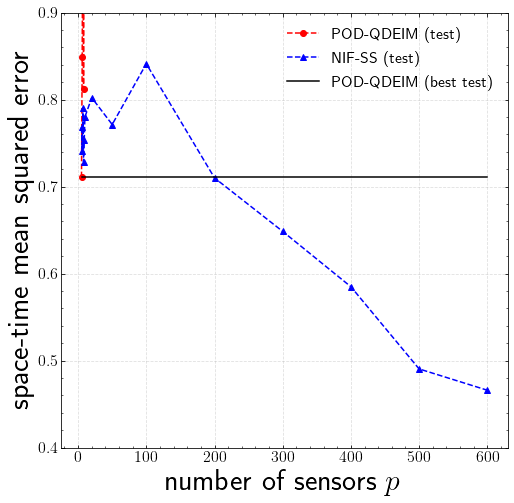

In [131]:
if PLOT_ALL:
    
    plt.figure(figsize=(8,8))
    plt.plot(SENSOR_ARR, test_qdeim_err_list.mean(axis=1),'r--o',label='POD-QDEIM (test)')
    plt.plot(SENSOR_ARR, test_nifss_err_list.mean(axis=1),'b--^',label='NIF-SS (test)')
    
    plt.plot(SENSOR_ARR, np.ones(SENSOR_ARR.shape)*np.min(test_qdeim_err_list.mean(axis=1)),'k-',label='POD-QDEIM (best test)')
    plt.ylim([0.4,0.9])
    plt.xlabel('number of sensors $p$',fontsize=30)
    plt.ylabel('space-time mean squared error',fontsize=30)
    plt.legend(loc='best')
    plt.savefig('./png-error-trend/compare_nolog_zoom_TEST.png',bbox_inches='tight')
    
    ibest_qdeim = np.argmin(test_qdeim_err_list.mean(axis=1))
    ibest_nifss = np.argmin(test_nifss_err_list.mean(axis=1))
    
    print('Best space-time mean squared error Searched over all QDEIM: rank         = ', SENSOR_ARR[ibest_qdeim], 
          ',   MSE = ', test_qdeim_err_list.mean(axis=1)[ibest_qdeim])
    print('Best space-time mean squared error Searched over all NIFSS: rank/sensors = ', SENSOR_ARR[ibest_nifss], 
          ', MSE = ', test_nifss_err_list.mean(axis=1)[ibest_nifss])